## Part 2. Random Variables
$$ \def\pr{\hbox{Pr}}
\def\var{\hbox{var}}
\def\cov{\hbox{cov}}
\def\corr{\hbox{corr}}
\def\dmX{\un{\mathcal{X}}}
\def\dmG{\un{\mathcal{G}}}
\def\dmK{\un{\mathcal{K}}}
\def\dmS{\un{\mathcal{S}}}
\def\dmC{\un{\mathcal{C}}}
\def\dmZ{\un{\mathcal{Z}}}
\def\bma{{\mbox{\boldmath $\alpha$}}}
\def\bmb{{\mbox{\boldmath $\beta$}}}
\def\bmu{{\mbox{\boldmath $\mu$}}}
\def\bme{{\mbox{\boldmath $\epsilon$}}}
\def\bmS{{\mbox{\boldmath $\Sigma$}}}
\def\bmL{{\mbox{\boldmath $\Lambda$}}}
\def\bmd{{\mbox{\boldmath $\delta$}}}
\def\bmD{{\mbox{\boldmath $\Delta$}}}
\def\bmG{{\mbox{\boldmath $\Gamma$}}}
\def\bmphi{{\mbox{\boldmath $\phi$}}}
\def\bmPhi{{\mbox{\boldmath $\Phi$}}}
\def\bmpsi{{\mbox{\boldmath $\psi$}}}
\def\bmtheta{{\mbox{\boldmath $\theta$}}}
\def\eq{\begin{equation}}
\def\eeq{\end{equation}}
\def\i{{\bf i}}
\def\un#1{{\bf #1}}$$

A measurement is never exactly reproducible. It is the outcome of a
complex process influenced by instrument noise, ambient conditions, and
so forth. It may be assumed, however, that there is an underlying random
process with an associated probability distribution which restricts the
possible outcomes in some way. Each time we make an observation we are
sampling from that probability distribution. Put another way, we are
observing a different possible <span>*realization*</span> of the random
process.

A <span>*random variable*</span> represents a quantity, which changes in
an unpredictable way each time it is observed.

Let some <span>*random experiment*</span>, e.g., a measurement, have a
set $\Omega$ of possible <span>*outcomes*</span>. This set is referred
to as the <span>*sample space*</span> for the experiment. Subsets of
$\Omega$ are called <span>*events*</span>. An event will be said to have
occurred whenever the outcome of the random experiment is contained
within it.

**Example:** The throw of two dice. The sample space:

$$\Omega = \{(1,1),(1,2),(2,1)\dots (6,6)\}.$$ 

An event: the sum of the
points is 7. $$\{(1,6),(2,5),(3,4),(4,3),(5,2),(6,1)\}$$ 

If for instance
$(3,4)$ is thrown, then the event has occurred.


<span>**Definition:**</span> A <span>*random variable*</span>
$Z: \Omega\mapsto \Re$ is a function which maps all outcomes onto the
set $\Re$ of real numbers such that the set

$$\{\omega\in\Omega\mid Z(\omega)\le z\} =: \{Z\le z\}$$ 

is an event,
i.e., a subset of $\Omega$.

Thus for the throw of two dice the sum of points $S$ is a random
variable, since it maps all outcomes onto real numbers:

$$S(1,1) = 2,\ S(1,2)=S(2,1) = 3,\ \dots\ S(6,6)=12,$$ 

and sets such as

$$\{S\le 4\} = \{(1,1),(1,2),(2,1),(1,3),(3,1),(2,2)\}$$ 

are subsets of
the sample space, that is to say, they are events. The set $\{S\le 1\}$
is the empty set, whereas $\{S\le 12\}=\Omega$, the entire sample space.

On the basis of the probabilities for the individual outcomes we can associate a
function $P(z)$ with the random variable $Z$ as follows:
$$
P(z) = \pr(Z\le z).
$$
This is the  probability of observing the event that the random variable $Z$ takes on a
value less than or equal to $z$, e.g.,
$$
P(4) = \pr(Z\le 4) = 6/36 = 1/6.
$$


**Definition:**
Given the random variable $Z$, then

$$
P(z) = {\rm Pr}(Z\le z),\quad -\infty < z < \infty
$$

is called its *distribution function.*

When a random variable $Z$ is <span>*discrete*</span> and takes on
values $z_1<z_2<z_3<\dots,$ then the probabilities of the outcomes

$$p(z_i) =\pr(Z=z_i) = P(z_i) - P(z_{i-1}),\quad i=1,2\dots$$ 

constitute
the <span>*mass function*</span> for the random variable.

**Example:** (Machine learning) The evaluation of a
predictive model involves repeated trials with a finite number of
independent test observations, keeping track of the number of times the
model fails to predict correctly.

Let $\theta$ be the probability of failure in a single trial. The
probability of getting $y$ failures (and hence $n-y$ successes) in $n$
trials <span>*in a specific sequence*</span> is

$$\theta^y(1-\theta)^{n-y}.$$ 

There is a factor $\theta$ for each of the
$y$ failures and a factor $(1-\theta)$ for each of the $n-y$ successes.
<span>*Taking the product is justified by the assumption that the trials
are independent of each other.*</span>

The number of such sequences is just the number of ways of selecting $y$
trials from $n$ possible ones. This is given by the <span>*binomial
coefficient*</span> 

$${n\choose y} = {n!\over (n-y)!\ y!},$$ 

so that the
probability for $y$ failures in $n$ trials is

$${n\choose y}\theta^y(1-\theta)^{n-y}.$$ 

The number of failures is then
described by the discrete random variable $Y$ which is said to be
<span>*binomially distributed*</span> with mass function given by 

$$
p_{n,\theta}(y) = \cases{{n\choose y}\theta^y(1-\theta)^{n-y} & for $y=0,1,2\dots n$\cr
                        \ 0 & otherwise.}
$$

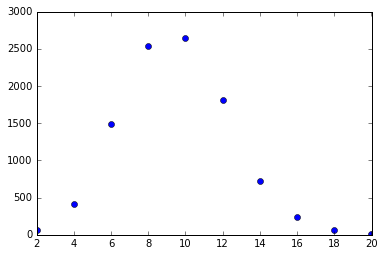

In [18]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
y,x = histogram(random.binomial(50,0.2, 10000))
p = plt.plot(x[:-1],y,marker='o',ls='')

**Continuous random variables**

**Definition:** A function with values $p(z)$, defined over the set of all real numbers,
is called a *probability density function* of the continuous random variable $Z$
if and only if

$$
\Pr(a\le Z \le b) = \int_a^b p(z)dz
$$

for any real numbers $a\le b$.

The quantity $p(z)dz$ is
the probability that the associated random variable $Z$ lies within the
infinitesimal interval $[z,z+dz]$. The integral over all such intervals is one:

$$
\int_{-\infty}^\infty p(z)dz = 1.
$$

The distribution function $P(z)$ can be written in terms of the density function and vice-versa as

$$
P(z) = \int_{-\infty}^z p(t)dt,\quad p(z) = {d\over dz}P(z).
$$

**Moments of a distribution**

The  *mean* or *expected value* of a continuous random variable $Z$ is defined by

$$
\langle Z\rangle = \int_{-\infty}^\infty z\cdot p(z) dz.
$$

The  *variance* of $Z$ describes how widely
the realizations scatter around the mean:

$$
\var(Z) = \left\langle(Z-\langle Z\rangle)^2\right\rangle.
$$

It is the mean of the random variable $Y=(Z-\langle Z\rangle)^2$.

In terms of the density function $p_y(y)$ of $Y$, the  variance is given by

$$
\var(Z) = \int_{-\infty}^\infty y\cdot p_y(y) dy,
$$

but in fact can be written more conveniently  as

$$
\var(Z) =  \int_{-\infty}^\infty (z-\langle Z\rangle)^2 p_z(z) dz,
$$

which is also referred to as the *second moment about the mean*.

For discrete random variables, the integrals are replaced by summations over the allowed
values of $Z$ and the probability density is replaced by the mass function.

**Exercise 1:**

(a)  Consider a *uniformly distributed* random variable $X$ with
density function

$$
p(x) = \cases{1 & if $0\le x \le 1$\cr 0 & otherwise.}
$$

Calculate the mean and variance.


(b) Prove the two *very*  useful identities:

$$\eqalign{
\var(Z) &= \langle Z^2\rangle - \langle Z\rangle^2\cr
\var(a_0+a_1Z) &= a_1^2\ \var(Z)}
$$

It is very often the case that random variables are well-described by the *normal*
or *Gaussian* density function

$$
p(z) = {1\over \sqrt{2\pi}\sigma}\exp(-{1\over 2\sigma^2}(z-\mu)^2).
$$

Its moments are

$$
\langle Z\rangle = \mu,\quad \var(Z) = \sigma^2,
$$

This is  abbreviated by writing

$$
Z \sim \mathcal{N}(\mu,\sigma^2).
$$



If $Z$ is normally distributed, then the *standardized* random variable
$(Z-\mu)/\sigma$ has the *standard normal distribution* with zero mean and unit variance

$$
\phi(t) ={1\over \sqrt{2\pi}}\exp(-t^2/2),
$$

with probability distribution function

$$
\Phi(z) = {1\over \sqrt{2\pi}}\int_{-\infty}^z \exp(-t^2/2)dt = \int_{-\infty}^z \phi(t)dt.
$$

From the symmetry of the density function it follows that

$$
\Phi(-z) = 1-\Phi(z),
$$

so it is sufficient to give tables only for $z\ge 0$. Note that

$$
P(z) =\pr(Z\le z) = \pr\left({Z-\mu\over\sigma}\le {z-\mu\over\sigma}\right)=\Phi\left({z-\mu\over\sigma}\right),
$$

so that values for any normally distributed random variable can be read from the table.

The idea of a distribution function is easily extended to more than one
random variable.
Let 

$$\un Z = \pmatrix{Z_1\cr Z_2}$$

be a *random vector*,
i.e., a vector of two random variables. The *joint distribution function*
of $\un Z$ is defined by

$$
P(\un z) = P(z_1,z_2) = \pr(Z_1\le z_1 \hbox{ and } Z_2\le z_2)
$$

or, in terms of the *joint density function* $p(z_1,z_2)$,

$$
P(z_1,z_2) = \int_{-\infty}^{z_1} \left[\int_{-\infty}^{z_2} p(t_1,t_2)dt_2\right] dt_1
$$

Conversely,

$$
p(z_1,z_1) = {\partial^2\over \partial z_1\partial z_2}P(z_1,z_2).
$$

The *marginal distribution function* for $Z_1$ is given by

$$
P_1(z_1) = P(z_1,\infty) =
 \int_{-\infty}^{z_1}\left[ \int_{-\infty}^\infty p(t_1,z_2)dz_2\right]dt_1
$$

and similarly for $Z_2$. The *marginal density* is defined as

$$
p_1(z_1) = \int_{-\infty}^\infty p(z_1,z_2)dz_2
$$

with a similar expression for $p_2(z_2)$.

**Definition:**

Two random variables $Z_1$ and $Z_2$ are said to be *independent* when their joint
distribution is the product of their marginal distributions:

$$
P(z_1,z_2) = P_1(z_1)P_2(z_2)
$$

or, equivalently, when their joint density is the product of their marginal densities:

$$
p(z_1,z_2) = p_1(z_1)p_2(z_2).
$$


It follows that

$$
\langle Z_1Z_2\rangle = \langle Z_1\rangle\langle Z_2\rangle.
$$

**Theorem:**

If the random variables $Z_1,Z_2,\dots$ are independent and normally distributed,
then the linear combination

$$
a_1 Z_1 + a_2 Z_2 + \dots
$$

is normally distributed with moments

$$
\mu = a_1\mu_1 + a_2\mu_2 + \dots,\quad \sigma^2 = a_1^2\sigma_1^2+a_2^2\sigma_2^2+\dots.
$$

This theorem implies that, if  $Z_i$, $i=1\dots n$, are identically distributed with mean $\mu$ and variance $\sigma^2$, then

$$
\bar Z = {1\over n}\sum_{i=1}^n Z_i
$$

is normally distributed with mean $\mu$ and variance $\sigma^2/n$.

**Central Limit Theorem:**

 If random variables $Z_1,Z_2\dots Z_n$ have
equal distributions with mean $\mu$ and variance $\sigma^2$, then the random variable

$$
{1\over \sigma\sqrt{n}}\sum_{i=1}^n (Z_i-\mu)
$$

is standard normally distributed in the limit $n\to\infty$.


This theorem implies that

$$\bar Z = {1\over n}\sum_{i=1}^n Z_i$$

is normally distributed with mean $\mu$ and variance $\sigma^2/n$ for large enough $n$.

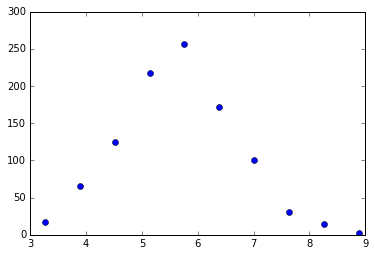

In [17]:
y,x = histogram(sum(random.rand(12,1000),0))
p = plt.plot(x[:-1],y,marker='o',ls='')

A random variable $Z$ is said to have a *gamma distribution* if its probability
density function is given by

$$
p_\gamma(z) = \cases{{1\over \beta^\alpha\Gamma(\alpha)}z^{\alpha-1}e^{-z/\beta} & for $z>0$\cr
            0 & elsewhere,}
$$

where $\alpha>0$ and $\beta>0$ and where the *gamma function* $\Gamma(\alpha)$ is given by

$$
\Gamma(\alpha) = \int_0^\infty z^{\alpha-1} e^{-z}dz,\quad \alpha>0.
$$


Note:
$$
\Gamma(1) = \int_0^\infty e^{-z}dz = 1.
$$

$$
\Gamma(1/2) = \sqrt{\pi}.
$$

**Exercise: 2**

(a) 

Prove that, for $\alpha>1$, $$\Gamma(\alpha)= (\alpha-1)\Gamma(\alpha-1)$$
and hence that, for positive integers $n$,

$$
\Gamma(n) = (n-1)!
$$

(Hint: Use integration by parts)


(b) 

Show that the gamma distribution has mean  and
variance

$$
\mu = \alpha\beta, \quad \sigma^2 = \alpha\beta^2.
$$

The *chi-square distribution with $n$ degrees of freedom* is a special case of the gamma distribution.
We get its density function with $\beta = 2$ and $\alpha = n/2$, i.e.,

$$
p_{\chi^2;n}(z)=\cases{{1 \over 2^{n/2}\Gamma(n/2)} z^{(n-2)/2} e^{-z/2} & for $z>0$\cr 0 & otherwise}
$$

It follows that the chi-square distribution has mean $$\mu = n$$ and variance
$$\sigma^2 = 2n.$$

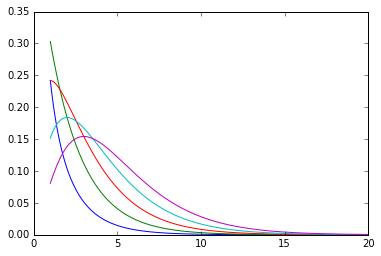

In [14]:
import scipy.stats as st

z = linspace(1,20,200)
for i in range(1,6):
    plt.plot(z,st.chi2.pdf(z,i))
plt.show()

**Theorem:** 

If the random variables $X_i$, $i=1\dots n$, are independent and standard normally distributed
(i.e., with mean $0$ and variance $1$) then the random variable

$$
 Z=\sum_{i=1}^n X_i^2
$$

is  chi-square distributed with $n$ degrees of freedom.

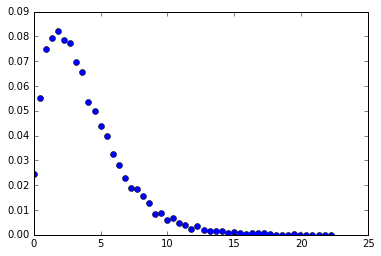

In [15]:
y,x = histogram(sum(random.normal(size=(4,10000))**2,0),bins=50)
y = y/float(sum(y))
p = plt.plot(x[:-1],y,'bo')

**Theorem:**

Let $p_x(x)$ be the density function for
random variable $X$ and 

$$y=u(x)$$ 

a monotonic function of $x$ for all
values of $x$ for which $p_x(x)\ne 0$. Then, for the corresponding
values of $y$, the density function of the random variable $Y = u(X)$ is
given by 

$$p_y(y) = p_x(w(y))\left|dx\over dy\right|,$$ 

where
$w(y) = u^{-1}(y)$, elsewhere $p_y(y) = 0$.

**Example:** Suppose that a random variable $X$ has the
exponential distribution with density function 

$$ p_x(x) = \cases{e^{-x} & for $x>0$\cr 0 & otherwise}$$ 

and we
wish to determine the probability density of the random variable
$Y=\sqrt{X}$. The monotonic function $y=u(x)=\sqrt{x}$ can be inverted
to give 

$$x = w(y) = u^{-1}(y) = y^2.$$ 

Thus

$$\left|{dx\over dy}\right| = |2y|,\quad p_x(w(y)) = e^{-y^2},$$ 

and we
obtain $$p_y(y) = 2y e^{-y^2}, \quad y>0.$$

**Example** Let the random variable $X$ be standard normally distributed with density function

$$
\phi(x) = {1\over\sqrt{2\pi}}\exp(-x^2/2), \quad -\infty < x < \infty.
$$

Let $Y=|X|$ where $X$ has the distribution $\Phi(x)$. For $y>0$ we have

$$
P(y) = \pr(Y\le y) = \pr(|X|\le y) = \pr(-y\le X\le y) =\Phi(y)-\Phi(-y).
$$

Hence

$$
p(y) = {d\over dy}P(y) = \phi(y)-\phi(-y) = 2\phi(y),
$$

and clearly for $y\le 0$, $p(y)=0$.

**Exercise 3:** Show that the random variable $Y=X^2$,
where $X$ is standard normally distributed, has the chi-square density function with $m=1$
degree of freedom.

### Conditional probability

If $A$ and $B$ are two events, i.e., two subsets of a sample space $\Omega$,
such that the probability of $A$ and $B$ occurring
simultaneously is $\pr(A,B)$, and if $\pr(B)\ne 0$, then the *conditional probability* of $A$ occurring
given that $B$ occurs} is defined to be

$$
\pr(A\mid B) = {\pr(A,B)\over \pr(B)}.\tag 1
$$

### Theorem of Total Probability

If $A_1,A_2\dots A_m$ are disjoint events associated with some random experiment
and if their union is the set of all possible events, then for any event $B$

$$
\pr(B) = \sum_{i=1}^m \pr(B\mid A_i)\pr(A_i)= \sum_{i=1}^m\pr(B,A_i).\tag 2
$$

Both Equations (1) and (2) have their
counterparts for probability density functions:

$$
p(x,y) = p(x\mid y)p(y)\tag 3
$$

and

$$
p(x) = \int_{-\infty}^\infty p(x\mid y)p(y)dy = \int_{-\infty}^\infty p(x,y)dy.\tag 4
$$

### Bayes' Theorem

*Bayes' Theorem* is the basic starting point for inference problems using
probability theory as logic.

**Motivation**

Two measurement frequency distributions for two categories $C_1$ and $C_2$:

<img src= 'bayes-1.png'  height='800' width='1200' />


1) $\pr(C_k)$ = prior probability for category $C_k$,  

$$
\pr(C_1) = {137\over 137+63}\quad \pr(C_2) = {63\over 137+63}
$$
    
 If we were to decide which category a new measurement will have, without futher information, then we would always say $C_1$.

2) $\pr(x) =$ probability for measuring a value $x$, e.g., probability for obtaining the value $x=4$:

$$
\pr(x=4) = {21+5\over 137+63}
$$

3) $\pr(x\mid C_k) = $ the conditional probability for measuring $x=4$ if the category is $C_k$, e.g.

$$
\pr(x=4\mid C_1) = {21\over 137}\quad \pr(x=4\mid C_2) = {5\over 63}
$$

Clearly we have

$$
\pr(x\mid C_1)\pr(C_1) + \pr(x\mid C_2)\pr(C_2) = \pr(x)
$$

4) $\pr(C_k\mid x) =$ posterior probability for category $C_k$ given the measurement $x$, e.g.,

$$
\pr(C_1\mid x=4) = {21\over 21+5}
$$
   

5) $\pr(C_k,x) =$ the joint probability the the measurement will be in category $C_k$ and have value $x$, e.g.

$$
\pr(C_1,x=4) = {21\over 137+63}
$$

Now it is easy to verify that

$$
\eqalign{ \pr(C_k,x) &= \pr(C_k\mid x)\pr(x)\quad\hbox{and}\cr
\pr(C_k,x) &= \pr(x\mid C_k)\pr(C_k)}
$$

so that the posterior probability is given by

$$
\pr(C_k\mid x) = {\pr(x\mid C_k)\pr(C_k)\over \pr(x)} = {\pr(x\mid C_k)\pr(C_k)\over \pr(x\mid C_1)\pr(C_1) + \pr(x\mid C_2)\pr(C_2)}
$$
    

**Bayes' Theorem** If $A_1,A_2\dots A_m$ are disjoint events associated with some random experiment,
their union is the set of all possible events, and if $\pr(A_i)\ne 0$ for
$i=1\dots m$, then for any event $B$ for which $\pr(B)\ne 0$

$$
\pr(A_k\mid B) = {\pr(B\mid A_k)\pr(A_k) \over \sum_{i=1}^m \pr(B\mid A_i)\pr(A_i)}.\tag 5
$$

In terms of probability density functions:

$$
p(a\mid b) = {p(a\mid b) \over \int p(b\mid a)p(a)da}  = {p(b\mid a)p(a) \over  p(b)}.\tag 6
$$


**Exercise 4:** In the game *Lets Make a Deal!* a contestant is asked to choose between one
of three doors. Behind one of the doors the prize is an automobile.
After the contestant has chosen, the quizmaster  opens one of the other two doors to show
that the automobile is not there. He then asks the contestant if she wishes to change her
mind and switch from her original choice to the other unopened door.
Use Bayes' Theorem to prove that her correct answer is "yes."